Kunskapskontroll 2- Av Elin Molvig Åsberg


### Importerar rätt bibliotek

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score


### Hämtar MNIST datasett

In [3]:
numbers = fetch_openml("mnist_784", version = 1, cache = True, as_frame = False)
print(numbers.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Infon i ovan text innehåller redan väldigt mycket och nästan det enda som vi behöver men jag gör ändå en mindre analys av datan.

In [5]:
X = numbers["data"]
y = numbers ["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

y_test = y_test.astype(int)
y_train = y_train.astype(int)

### Utforska MNIST

In [6]:
df_X_y = pd.DataFrame(X_train) #Gör en dataframe för att kolla Value.counts
df_X_y["target"] = y_train

df_X_y["target"].value_counts().sort_index()





target
0    5560
1    6277
2    5610
3    5708
4    5529
5    5040
6    5480
7    5790
8    5468
9    5538
Name: count, dtype: int64

In [64]:
df_X = df_X_y.drop(columns=["target"])
df_y = df_X_y["target"]

X_checkdigit = df_X.to_numpy() #Gör om det till en numpy array för att kunna använda i funktionen nedan. Jag ser fortfarande endast på träningsdatat. Och ja inser att jag kunde använt mig av mina orginal variablar...
y_checkdigit= df_y.to_numpy()

In [65]:
y_checkdigit = y_checkdigit.astype(int) #måste konvertera den till int för att funka i funktionen.

Nedan fick jag koden som tips för att kolla hur siffrorna såg ut. 

In [66]:
def show_examples(X, y, digit, n=16, image_shape=(28, 28)):
    idx = np.where(y == digit)[0][:n]
    fig, axes = plt.subplots(4, 4, figsize=(4, 4))

    for ax, i in zip(axes.ravel(), idx):
        img = X[i].reshape(image_shape) if X[i].ndim == 1 else X[i]
        ax.imshow(img, cmap="gray")
        ax.axis("off")

    plt.suptitle(f"Examples of digit {digit}")
    plt.tight_layout()
    plt.show() 

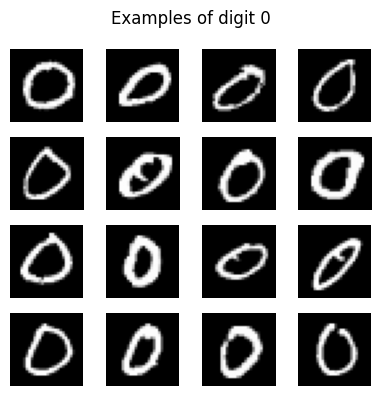

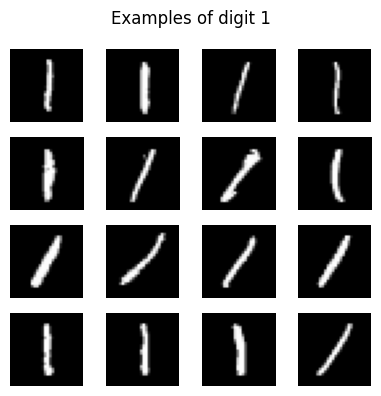

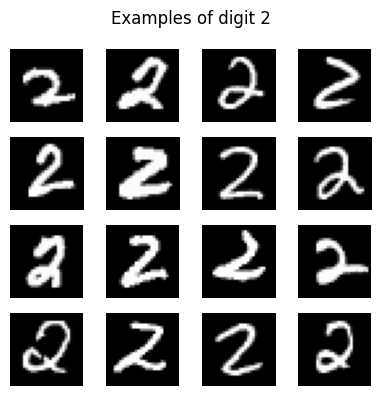

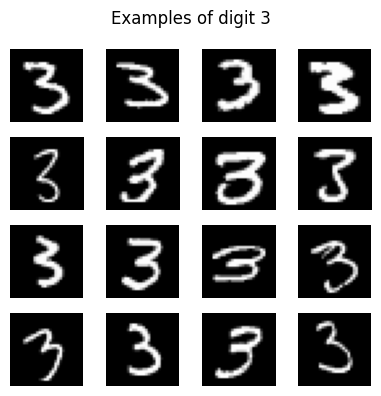

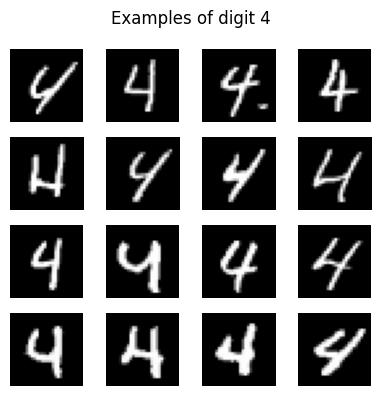

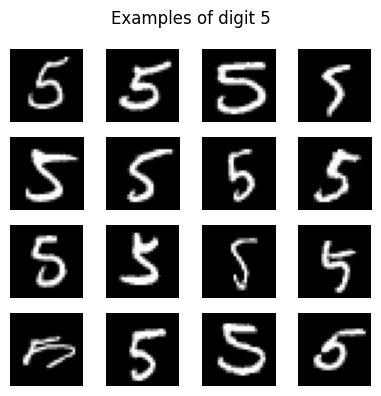

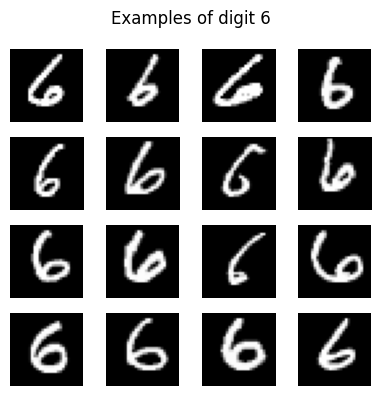

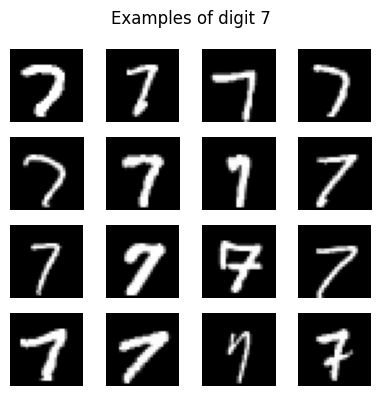

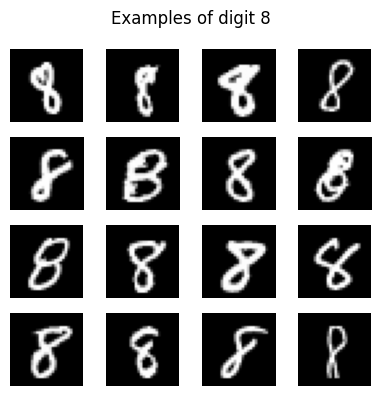

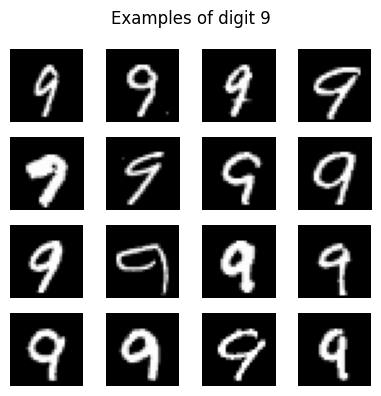

In [67]:
show_examples(X_checkdigit, y_checkdigit , 0, n=16, image_shape=(28,28))
show_examples(X_checkdigit, y_checkdigit , 1, n=16, image_shape=(28,28))
show_examples(X_checkdigit, y_checkdigit , 2, n=16, image_shape=(28,28))
show_examples(X_checkdigit, y_checkdigit , 3, n=16, image_shape=(28,28))
show_examples(X_checkdigit, y_checkdigit , 4, n=16, image_shape=(28,28))
show_examples(X_checkdigit, y_checkdigit , 5, n=16, image_shape=(28,28))
show_examples(X_checkdigit, y_checkdigit , 6, n=16, image_shape=(28,28))
show_examples(X_checkdigit, y_checkdigit , 7, n=16, image_shape=(28,28))
show_examples(X_checkdigit, y_checkdigit , 8, n=16, image_shape=(28,28))
show_examples(X_checkdigit, y_checkdigit , 9, n=16, image_shape=(28,28))


### Reflektion

Mnist hade en väldigt väl kommenterad info, det är väldigt bra sorterat datasett med bra spridning. Siffrorna har pixelvärde mellan 0-255(gråskala), Mnist är 28 x 28 pixlar alltså en 784 features. 

Jag känner mig redo för att prova vår första modell LogisticRegression. 

In [ ]:
y_train = y_train.astype("int64") #Konverterar y-varibeln ("target" med orginal datatyp object) till int

def scale_pixels(X):
    return X.astype(np.float32) / 255.0  #Skapar en funktion som ändrar datatyp till float32 går lite snabbare att träna modellerna. Samt skalar den med datan med /255 istället för att använda StandardScaler.

pipeline = Pipeline([
    ("Scale", FunctionTransformer(scale_pixels)),
    ("model", LogisticRegression(max_iter=3000, solver="lbfgs"))
])

param_grid = [
{
    "model__C": [0.1, 0.3, 1.0, 3.0, 10.0],
    "model__penalty":["l2"]
}

]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #Väljer stratified K-fold då den delar upp y i jämna delar så alla siffror tränas.

gridlog = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs= -1,
    verbose=1

)

gridlog.fit(X_train, y_train)

print("Best score:", gridlog.best_score_)
print("Best params:", gridlog.best_params_)

best_model_logres=gridlog.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\elin-\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Best score: 0.9221785714285714
Best params: {'model__C': 0.3, 'model__penalty': 'l2'}


Jag tyckte inte den presterade såpass som jag hoppats, så jag provar en annan modell (RandomForrest Classifier) nedan för att se om det är värt att börja justera hyperparametrar.

In [78]:
pipelineRF = Pipeline([
    ("Scale", FunctionTransformer(scale_pixels)),
    ("model", RandomForestClassifier(random_state=42, n_jobs=1))
])

X_sub, _, y_sub, _ = train_test_split(
    X_train,
    y_train,
    train_size=0.3,
    stratify=y_train,
    random_state=42
)

param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 20, 40],
    "model__max_features": ["sqrt", "log2"],
    "model__min_samples_split": [2, 10], 
    "model__min_samples_leaf": [1, 2, 4], 
}

cv = StratifiedKFold(
    n_splits= 5,
    shuffle=True,
    random_state=42
)

gridrandfor = GridSearchCV(
    pipelineRF,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

gridrandfor.fit(X_sub, y_sub)

print(gridrandfor.best_score_)
print(gridrandfor.best_params_)
print(gridrandfor.best_estimator_)

best_model_randomforest = gridrandfor.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.9560119047619049
{'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 400}
Pipeline(steps=[('Scale',
                 FunctionTransformer(func=<function scale_pixels at 0x0000024E97D537E0>)),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=400,
                                        n_jobs=1, random_state=42))])


Okej den var ännu bättre, jag gör nu samma nedan med SVC för att se vilken jag bör lägga mest tid på.

In [84]:
pipeline_svc = Pipeline([
    ("std", StandardScaler()),             
    ("pca", PCA(whiten=True, random_state=42)),
    ("model", SVC())
])

param_grid = {
    "pca__n_components": [30, 40, 50,],
    "model__kernel": ["rbf", "linear"],
    "model__C": [6, 7, 8, 10],
    "model__gamma": ["scale", 0.01, 0.03, 0.05],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

gridsvc = GridSearchCV(
    pipeline_svc,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

gridsvc.fit(X_sub, y_sub)

print(gridsvc.best_score_)
print(gridsvc.best_params_)
print(gridsvc.best_estimator_)

best_model_SVC = gridsvc.best_score_  #Resulat 1 = 95,33%, Resultat 2, 95,36% (5 min fit), resultat 3 95.40%

Fitting 3 folds for each of 96 candidates, totalling 288 fits
0.954047619047619
{'model__C': 6, 'model__gamma': 0.03, 'model__kernel': 'rbf', 'pca__n_components': 40}
Pipeline(steps=[('std', StandardScaler()),
                ('pca', PCA(n_components=40, random_state=42, whiten=True)),
                ('model', SVC(C=6, gamma=0.03))])


Jag hade höga förväntningar på SVC men den gav inte de resultat jag hoppades på trots hyperparameter justeringar. Men jag körde endast på Subset, jag provar nedan på ett större datasett

In [9]:
pipeline_svc = Pipeline([
    ("std", StandardScaler()),             
    ("pca", PCA()),
    ("model", SVC())
])

param = {
    "pca__n_components": [65, 68, 70, 75],
    "model__kernel": ["rbf"],
    "model__C": [20],
    "model__gamma": ["scale"]
} 

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

gridsvc = GridSearchCV(
    pipeline_svc,
    param_grid=param,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

gridsvc.fit(X_train, y_train)

print(gridsvc.best_score_)
print(gridsvc.best_params_)
print(gridsvc.best_estimator_)    
 # Resultat 1) 97,36 (C:6, gamma scale, kernel:rbf, pca:60) 
# Resultat 2) 97,48 (C:15, gamma scale, kernel:rbf, pca:60) 
# # Resultat 3) 97,48 (C:20, gamma scale, kernel:rbf, pca:60) 
# Resultat 4) 97,51 (C:20, gamma scale, kernel:rbf, pca:65)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.9751964199457621
{'model__C': 20, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'pca__n_components': 65}
Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=65)),
                ('model', SVC(C=20))])


SVC tycker jag presterar bra med mer data att jobba med och efter ändringar av hyperparameter. Bästa är 97,51% accuracy och det är jag väldigt nöjd med. Jag ska nedan prova min Random Forrest med Gridsearch och denna gång och prova att göra justeringar på hyperparametrar och se om jag kan få ännu bättre än min SVC. Jag fick ett så bra resultat på mitt subset på Random Forrest så ska bli spännande att se hur den presterar på mer data. 

In [95]:
pipelineRF = Pipeline([
    ("Scale", FunctionTransformer(scale_pixels)),
    ("model", RandomForestClassifier(random_state=42, n_jobs=1))
])

param_grid = {
    "model__n_estimators": [450, 500, 600],
    "model__max_depth": [None, 20, 30],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 3], 
    "model__min_samples_leaf": [1], 
}

cv = StratifiedKFold(
    n_splits= 5,
    shuffle=True,
    random_state=42
)

gridrandfor = GridSearchCV(
    pipelineRF,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

gridrandfor.fit(X_sub, y_sub)

print(gridrandfor.best_score_)
print(gridrandfor.best_params_)
print(gridrandfor.best_estimator_)

best_model_randomforest = gridrandfor.best_score_

# 0.9560119047619049 {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 400}
#2  0.95625 {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 500}

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.95625
{'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Pipeline(steps=[('Scale',
                 FunctionTransformer(func=<function scale_pixels at 0x0000024E97D537E0>)),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=500,
                                        n_jobs=1, random_state=42))])


Kör en snabb copypaste (lat, vet att det är onödigt att köra GridSearchCV, men ville bara köra en snabb koll) nedan på randomforrest på hela datasettet för att se. Och som jag misstänkte så presterar den bättre på ett mindre dataset än ett stort.. 

In [96]:
pipelineRF = Pipeline([
    ("Scale", FunctionTransformer(scale_pixels)),
    ("model", RandomForestClassifier(random_state=42, n_jobs=1))
])

param_grid = {
    "model__n_estimators": [500],
    "model__max_depth": [20],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2], 
    "model__min_samples_leaf": [1] 
}

cv = StratifiedKFold(
    n_splits= 5,
    shuffle=True,
    random_state=42
)

gridrandfor = GridSearchCV(
    pipelineRF,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

gridrandfor.fit(X_train, y_train)

print(gridrandfor.best_score_)
print(gridrandfor.best_params_)
print(gridrandfor.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.9685178571428571
{'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Pipeline(steps=[('Scale',
                 FunctionTransformer(func=<function scale_pixels at 0x0000024E97D537E0>)),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=500,
                                        n_jobs=1, random_state=42))])


Okej den presterar absolut bra men inte lika bra som min SVC. Inser också nu i efterhand att det var onödigt att ha med skalning i Random Forrest då den inte behöver det. Men gjorde heller ingen skada i detta fall. Jag har bestämt mig för att gå vidare med min SVC modell. 

Nu kör vi testdatan och gör en Confusion Matrix på SVC som presterat bäst av alla modeller med en accuracy på 97,5%. 

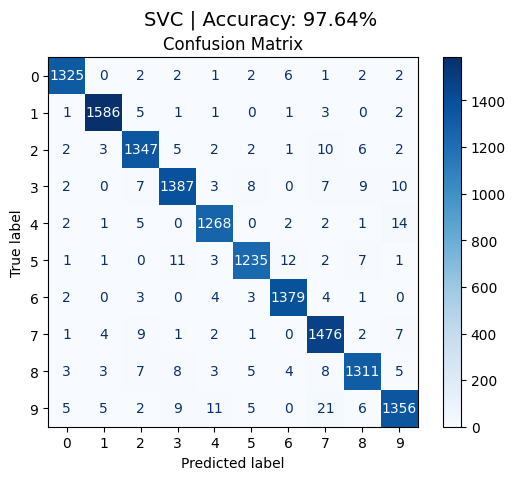

In [10]:
best_model = gridsvc.best_estimator_

y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

conmat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conmat)
disp.plot(cmap="Blues", values_format="d")

plt.suptitle(f"SVC | Accuracy: {acc*100:.2f}%", fontsize=14)
plt.title("Confusion Matrix")
plt.show()


In [14]:
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_test, y_pred))

plt.suptitle(
    f"SVC | Acc: {acc*100:.2f}% | "
    f"Prec: {precision:.3f} | "
    f"Recall: {recall:.3f} | "
    f"F1: {f1:.3f}",
    fontsize=14
)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.98      0.97      1503
           8       0.97      0.97      0.97      1357
           9       0.97      0.95      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



Text(0.5, 0.98, 'SVC | Acc: 97.64% | Prec: 0.976 | Recall: 0.976 | F1: 0.976')

<Figure size 640x480 with 0 Axes>

Kul fick upp accuracy lite. 
Tycker det ser ganska jämt ut. Den tror ofta att det är en 7:a när det är en 9:a, även att det är en 9:a när det är en 4:a. Detta ska jag ha i åtanke i min preprocesseing inför Streamlit. Men overall är jag nöjd. Jag ska nu träna om den på all data.


In [10]:
X_all = np.vstack([X_train, X_test])   #Jag vet att jag har hela settet ovan men detta är redan förbereda som integers så tyckte det var smidigare
y_all = np.hstack([y_train, y_test])

final_svc = Pipeline([
    ("std", StandardScaler()),             
    ("pca", PCA(n_components=65)),
    ("model", SVC(C=20, gamma='scale', kernel='rbf', probability=True))
])

final_svc.fit(X_all, y_all)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('std', ...), ('pca', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",65
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full

Spara vår modell i Joblib

In [11]:
joblib.dump(final_svc, "mnist_svc_final.pkl")

['mnist_svc_final.pkl']

### SLUTORD

Jag gjorde från början uppdelning av datasettet på 80/20. Nu i efterhand hade det varit bättre att göra en manuell uppdelning om 60 000 och 10 000 som står i beskrivningen. Men sjuka barn och vabb gjorde att jag inte hade tid att träna om alla modeller. Jag är ändå nöjd med mitt resultat på 97,64%. 